## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



In [2]:
# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

mMean = mouse_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mMedian = mouse_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
mVariance = mouse_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
mStdDev = mouse_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
mSEM = mouse_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_stats = {
    'Mean': mMean,
    'Median': mMedian,
    'Variance': mVariance,
    'Standard Deviation': mStdDev,
    'SEM': mSEM
}

summary_df = pd.DataFrame(summary_stats)
sort_summary_df = summary_df.sort_values('Mean')
sort_summary_df

,Mean,Median,SEM,Standard Deviation,Variance
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,0.320955,4.846308,23.486704
Capomulin,40.675741,41.557809,0.329346,4.994774,24.947764
Propriva,52.322552,50.854632,0.512884,6.507770,42.351070
Ceftamin,52.591172,51.776157,0.469821,6.268188,39.290177
Infubinol,52.884795,51.820584,0.492236,6.567243,43.128684
Zoniferol,53.236507,51.818479,0.516398,6.966589,48.533355
Placebo,54.033581,52.288934,0.581331,7.821003,61.168083
Stelasyn,54.233149,52.431737,0.573111,7.710419,59.450562
Naftisol,54.331565,52.509285,0.596466,8.134708,66.173479


## Bar plots

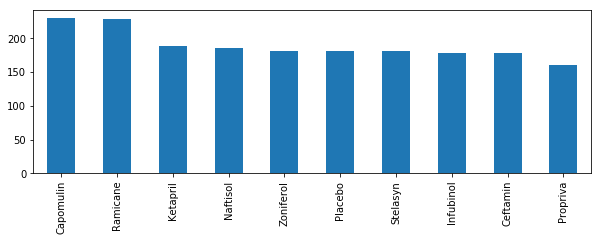

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
grouped_regimen = mouse_df['Drug Regimen'].value_counts()
grouped_regimen.plot(kind='bar', figsize=(10,3))
plt.show()

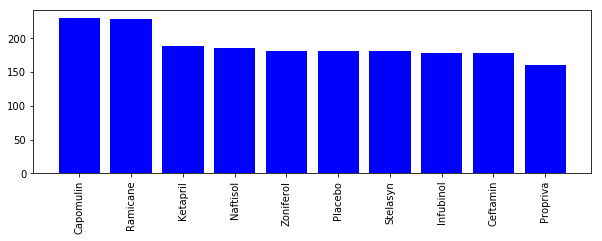

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(grouped_regimen))
labels = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva']
plt.figure(figsize=(10,3))
plt.bar(x_axis, grouped_regimen, color = 'b')
plt.xticks([value for value in x_axis], labels, rotation="vertical")
plt.show()

## Pie plots

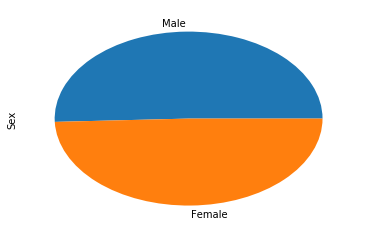

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_sex = mouse_df['Sex'].value_counts()
grouped_sex.plot(kind='pie')
plt.show()

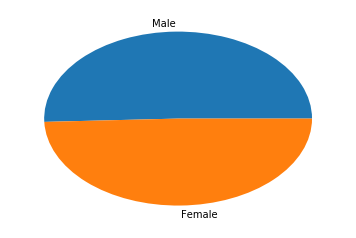

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sLabels = ['Male', 'Female']
plt.pie(grouped_sex, labels=sLabels)
plt.show()

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
leaders = sort_summary_df.reset_index()['Drug Regimen'][0:4]
converted_mouse_df = mouse_df.copy()
converted_mouse_df['Timepoint'] = converted_mouse_df.loc[:,'Timepoint'].astype(int)

final_df = converted_mouse_df.loc[(converted_mouse_df['Timepoint'] == 45) & (converted_mouse_df['Drug Regimen'].isin(leaders)), :]

quartiles = final_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f'The quartiles are l={lowerq}, m={quartiles[.5]}, u={upperq}')
print(f'The interquartile range is {iqr}')
print(f'Values above {upper_bound} could be outliers')
print(f'Values below {lower_bound} could be outliers')
print(f'The largest value is {final_df["Tumor Volume (mm3)"].max()} which is within our upper bound')
print(f'The largest value is {final_df["Tumor Volume (mm3)"].min()} which is within our lower bound')



The quartiles are l=33.39765251, m=38.98287774, u=61.43389223
The interquartile range is 28.036239719999998
Values above 103.48825181 could be outliers
Values below -8.656707069999996 could be outliers
The largest value is 72.45542116 which is within our upper bound
The largest value is 22.05012627 which is within our lower bound


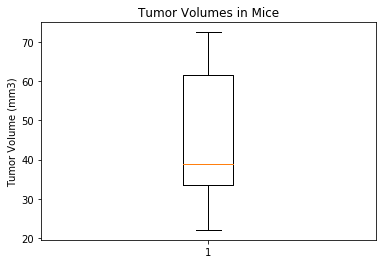

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumors = final_df['Tumor Volume (mm3)'].tolist()
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes in Mice')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumors)
plt.show()

## Line and scatter plots

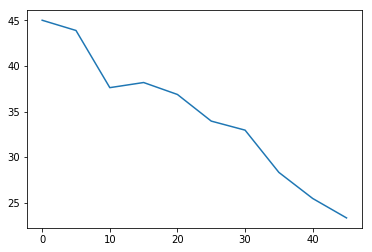

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_id = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Capomulin'),:].iloc[0]['Mouse ID']
independent = mouse_df.loc[(mouse_df['Mouse ID'] == mouse_id),'Timepoint']
dependent = mouse_df.loc[(mouse_df['Mouse ID'] == mouse_id),'Tumor Volume (mm3)']
plt.plot(independent, dependent)
plt.show()

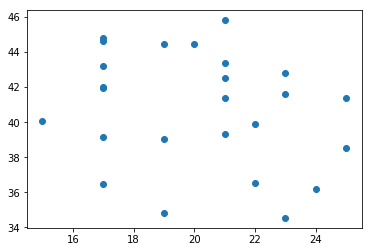

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Capomulin')&(mouse_df['Timepoint'] == 0),'Weight (g)']
tumor_volume = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Capomulin'),:].groupby('Mouse ID').mean()['Tumor Volume (mm3)']
plt.scatter(mouse_weight, tumor_volume)
plt.show()

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f'The correlation coefficient is {rvalue}')
print(f'The R-squred is {rvalue**2}')

y = -0.26x + 46.05
The correlation coefficient is -0.23201324646524474
The R-squred is 0.0538301465353424
